In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

# Load the dataset
file_path = 'Customer Churn Modeling.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.head(5)


,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Checking for duplicates
duplicates = data.duplicated().sum()

# Checking for missing values
missing_values = data.isnull().sum()

# Summary
data_summary = {
    "Duplicates": duplicates,
    "Missing Values": missing_values
}

data_summary

{'Duplicates': 0,
 'Missing Values': user_id                     0
 attrition_flag              0
 customer_age                0
 gender                      0
 dependent_count             0
 education_level             0
 marital_status              0
 income_category             0
 card_category               0
 months_on_book              0
 total_relationship_count    0
 months_inactive_12_mon      0
 contacts_count_12_mon       0
 credit_limit                0
 total_revolving_bal         0
 avg_open_to_buy             0
 total_amt_chng_q4_q1        0
 total_trans_amt             0
 total_trans_ct              0
 total_ct_chng_q4_q1         0
 avg_utilization_ratio       0
 dtype: int64}

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


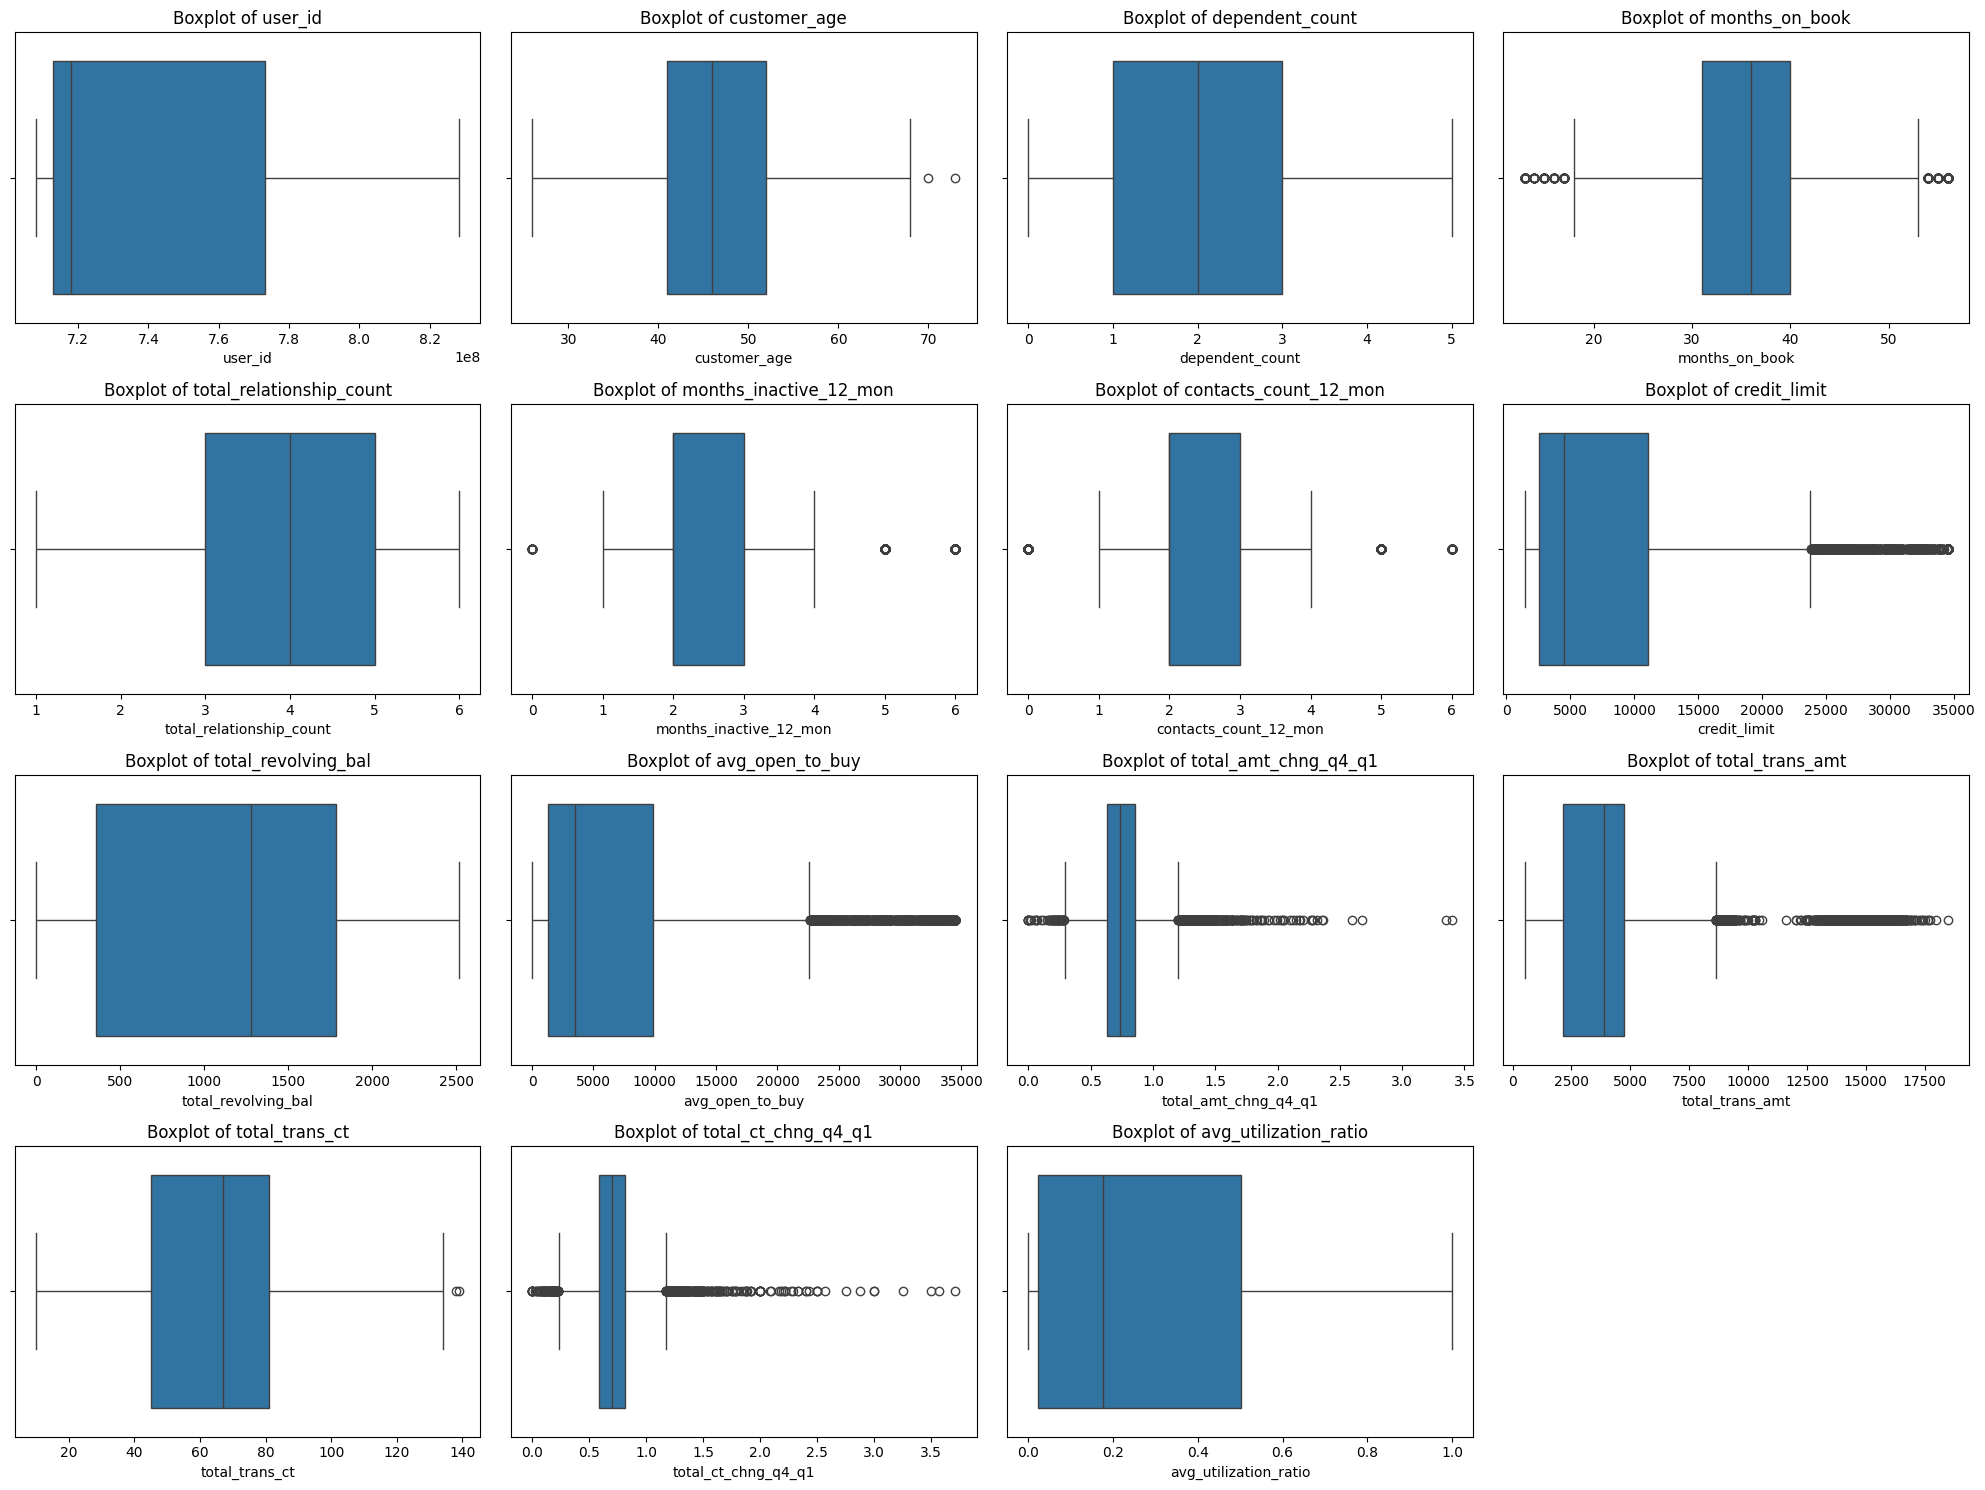

In [ ]:
# Select numeric columns for analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate statistical summary for numeric columns
stat_summary = data[numeric_columns].describe()

# Detect potential anomalies/outliers using boxplots
plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()

# Display statistical summary
stat_summary

In [ ]:
import numpy as np

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The DataFrame to remove outliers from.
        columns (list): A list of column names to check for outliers.
        threshold (float): The IQR multiplier for outlier detection.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        # Remove rows outside the IQR bounds
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from numeric columns
data_cleaned = remove_outliers_iqr(data.copy(), numeric_columns)

# Compare original and cleaned dataset
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape

((10127, 21), (6463, 21))

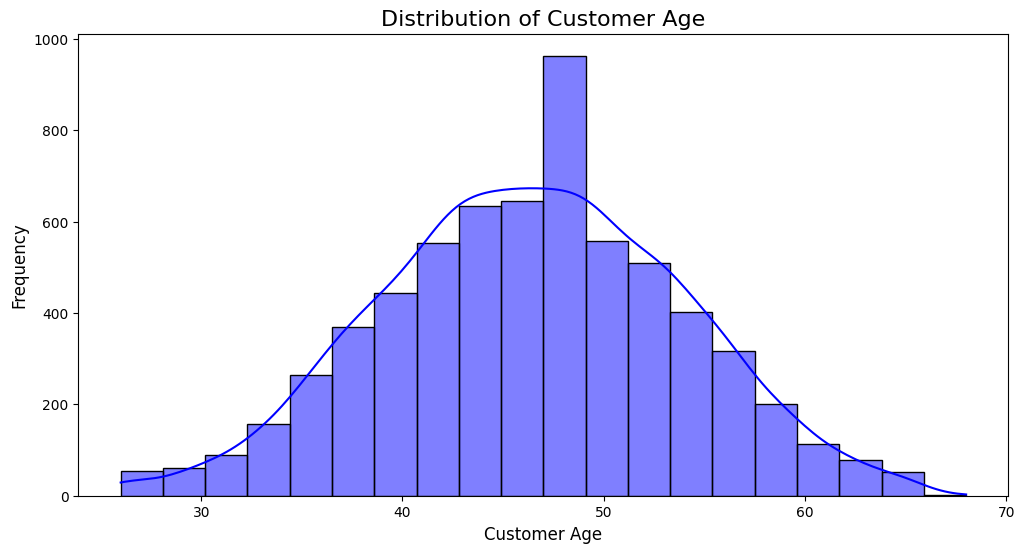

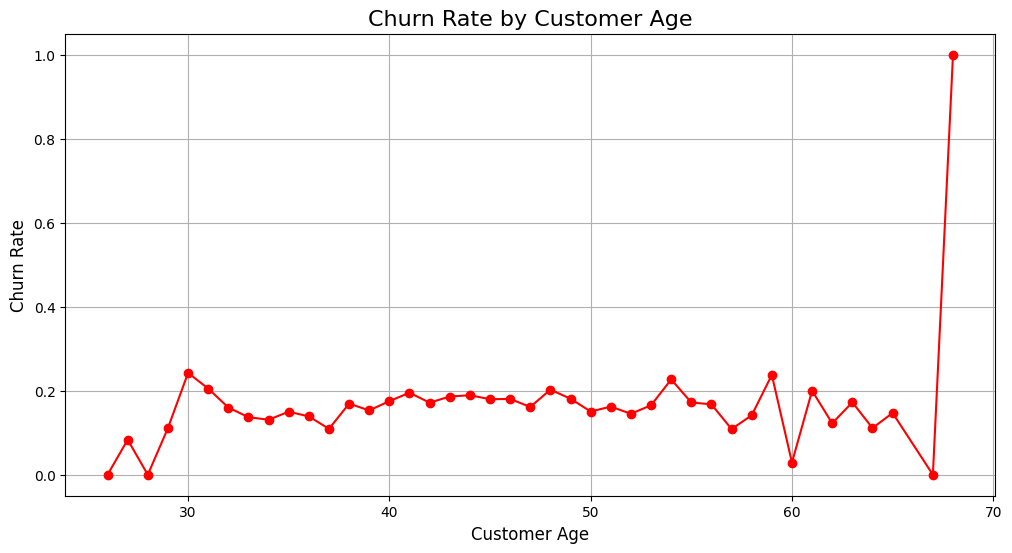

(68, 1.0)

In [ ]:
import matplotlib.pyplot as plt

# Distribution of customer age
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['customer_age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Customer Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Relationship between age and churn
# Map churn status to binary values (1 for Attrited Customer, 0 for Existing Customer)
data_cleaned['churn'] = data_cleaned['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Calculate churn rate by age
churn_by_age = data_cleaned.groupby('customer_age')['churn'].mean()

# Plot churn rate by age
plt.figure(figsize=(12, 6))
churn_by_age.plot(kind='line', color='red', marker='o')
plt.title('Churn Rate by Customer Age', fontsize=16)
plt.xlabel('Customer Age', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.grid()
plt.show()

churn_by_age.idxmax(), churn_by_age.max()

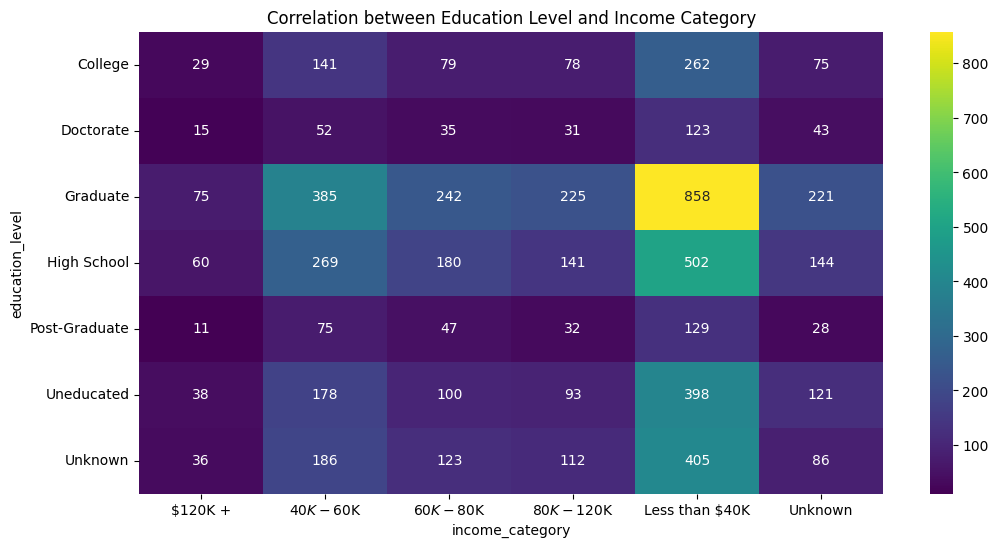

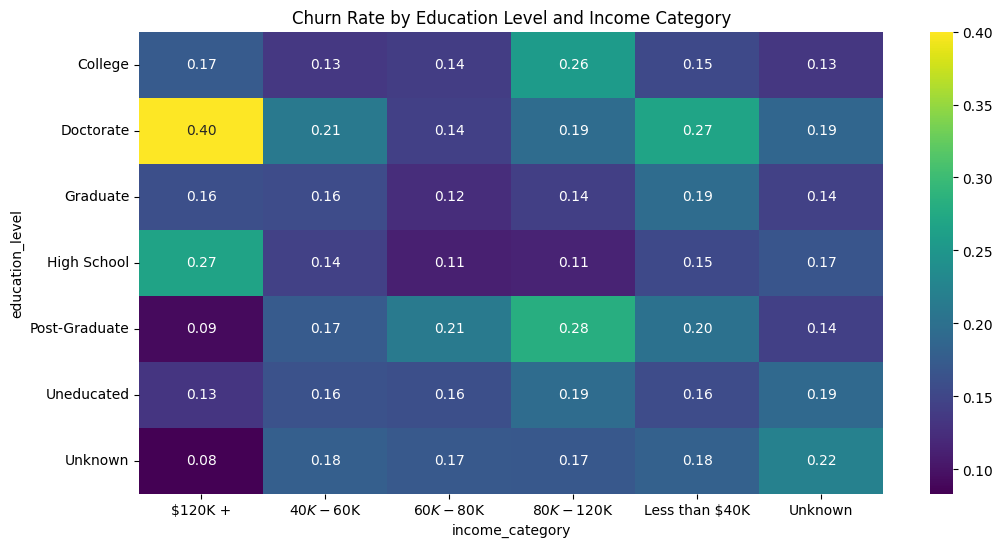

Chi-squared test for education_level and churn: Chi2 = 15.02667812193897, p-value = 0.02005023109694722
Chi-squared test for income_category and churn: Chi2 = 7.772763535837858, p-value = 0.16921174053562202


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the correlation between education_level and income_category
correlation_education_income = data_cleaned.groupby(['education_level', 'income_category']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_education_income, annot=True, fmt='d', cmap='viridis')
plt.title('Correlation between Education Level and Income Category')
plt.show()

# Analyze the correlation of education_level and income_category with churn
# Convert 'churn' to numeric if it's not already
if not pd.api.types.is_numeric_dtype(data_cleaned['churn']):
    data_cleaned['churn'] = pd.to_numeric(data_cleaned['churn'], errors='coerce')


# Calculate the churn rate for each combination of education_level and income_category
churn_by_education_income = data_cleaned.groupby(['education_level', 'income_category'])['churn'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(churn_by_education_income, annot=True, fmt='.2f', cmap='viridis')
plt.title('Churn Rate by Education Level and Income Category')
plt.show()


# Further analysis:  Statistical tests (chi-squared, etc.)  could be performed to determine statistical significance of these relationships.
# Example using chi-squared (requires contingency table)

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data_cleaned['education_level'], data_cleaned['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for education_level and churn: Chi2 = {chi2}, p-value = {p}")

contingency_table = pd.crosstab(data_cleaned['income_category'], data_cleaned['churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test for income_category and churn: Chi2 = {chi2}, p-value = {p}")

Chi-squared test for gender and churn:
Chi2 = 8.774241863251408
p-value = 0.003055141158184838
Degrees of freedom = 1
There is a statistically significant association between gender and churn.


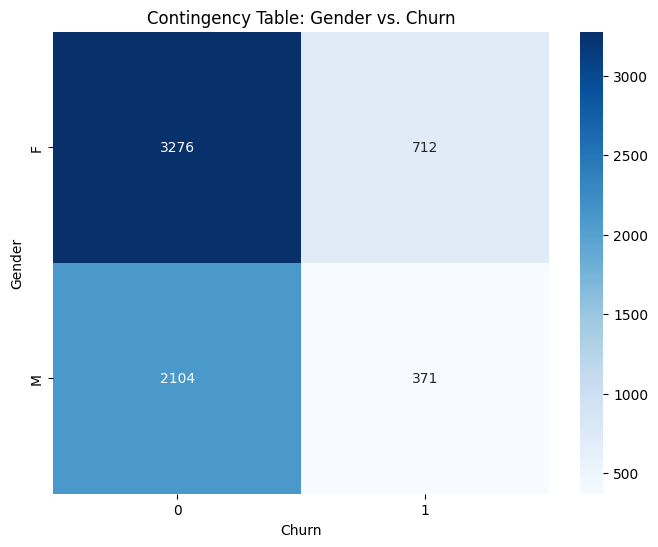

In [ ]:
# Create a contingency table for gender and churn
contingency_table = pd.crosstab(data_cleaned['gender'], data_cleaned['churn'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for gender and churn:\nChi2 = {chi2}\np-value = {p}\nDegrees of freedom = {dof}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between gender and churn.")
else:
    print("There is no statistically significant association between gender and churn.")

# Visualize the contingency table (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Contingency Table: Gender vs. Churn")
plt.xlabel("Churn")
plt.ylabel("Gender")
plt.show()

Chi-squared test for months_on_book and attrition_flag:
Chi2 = 41.08701003896638
p-value = 0.22127920028623546
Degrees of freedom = 35
There is no statistically significant association between months_on_book and attrition_flag (customer churn).


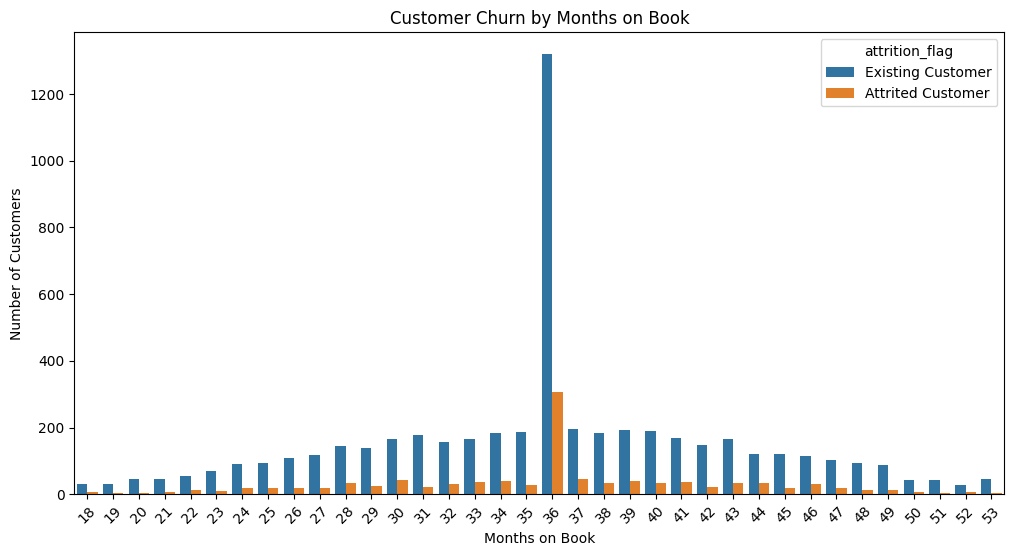

In [ ]:
# Create a contingency table for months_on_book and attrition_flag
contingency_table = pd.crosstab(data_cleaned['months_on_book'], data_cleaned['attrition_flag'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for months_on_book and attrition_flag:\nChi2 = {chi2}\np-value = {p}\nDegrees of freedom = {dof}")

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between months_on_book and attrition_flag (customer churn).")
else:
    print("There is no statistically significant association between months_on_book and attrition_flag (customer churn).")

# Visualize the relationship (optional)
plt.figure(figsize=(12, 6))
sns.countplot(x='months_on_book', hue='attrition_flag', data=data_cleaned)
plt.title('Customer Churn by Months on Book')
plt.xlabel('Months on Book')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

Chi-squared test for total_relationship_count and churn:
Chi2 = 238.35910939850794
p-value = 1.726227255454761e-49
Degrees of freedom = 5
There is a statistically significant association between total_relationship_count and churn.


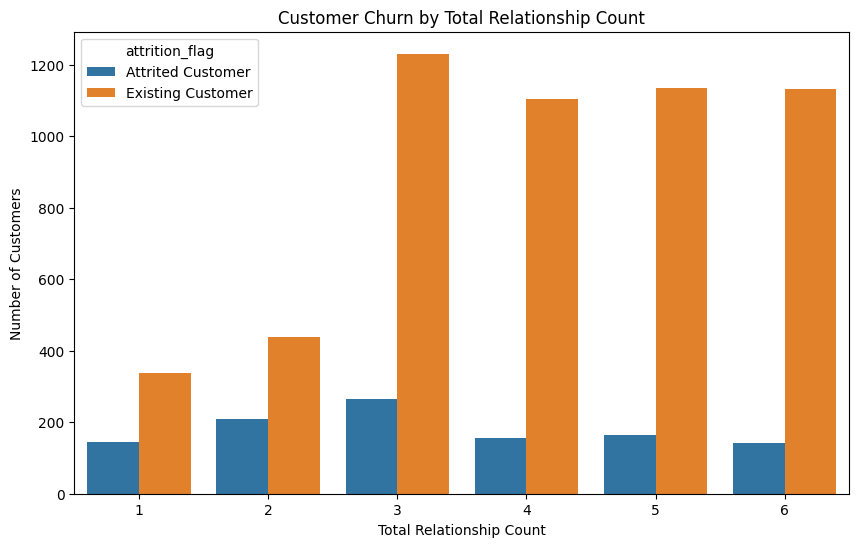

In [ ]:
# Analyze the relationship between customer interaction frequency and churn
# Assuming 'total_interactions' represents the frequency of customer interactions

# Calculate total interactions within the last year (you might need to adjust this based on your actual interaction data)
# For example, if you have separate columns for interactions (e.g., 'contacts_count', 'transactions_count'), sum them up
#data_cleaned['total_interactions'] = data_cleaned['contacts_count'] + data_cleaned['transactions_count']  # Replace with your actual columns

# If 'total_interactions' is already in the dataset, proceed directly to creating the contingency table
contingency_table = pd.crosstab(data_cleaned['total_relationship_count'], data_cleaned['churn']) # Replace 'total_interactions' with your actual column name

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared test for total_relationship_count and churn:\nChi2 = {chi2}\np-value = {p}\nDegrees of freedom = {dof}")

alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between total_relationship_count and churn.")
else:
    print("There is no statistically significant association between total_relationship_count and churn.")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='total_relationship_count', hue='attrition_flag', data=data_cleaned)
plt.title('Customer Churn by Total Relationship Count')
plt.xlabel('Total Relationship Count')
plt.ylabel('Number of Customers')
plt.show()

# Further analysis:
# You can explore the relationship in more detail by segmenting the 'total_interactions' into different categories (e.g., low, medium, high interaction frequency)
# and then calculating the churn rate within each segment.
# You might also consider other relevant interaction variables in addition to 'total_interactions',
# such as the type of interactions or the channels used for interactions.

In [ ]:
# Data Preprocessing for Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['gender', 'education_level', 'marital_status', 'income_category', 'card_category']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Store the label encoders for later use

# Separate features (X) and target (y)
X = data_cleaned.drop(['attrition_flag', 'churn'], axis=1)
y = data_cleaned['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training (Example using Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Example using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9126063418406806
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1091
           1       0.74      0.67      0.71       202

    accuracy                           0.91      1293
   macro avg       0.84      0.82      0.83      1293
weighted avg       0.91      0.91      0.91      1293

[[1044   47]
 [  66  136]]

Random Forest Accuracy: 0.9621036349574633
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1091
           1       0.90      0.86      0.88       202

    accuracy                           0.96      1293
   macro avg       0.94      0.92      0.93      1293
weighted avg       0.96      0.96      0.96      1293

[[1071   20]
 [  29  173]]


Logistic Regression ROC AUC: 0.9477634289551778
Random Forest ROC AUC: 0.9848581100089844


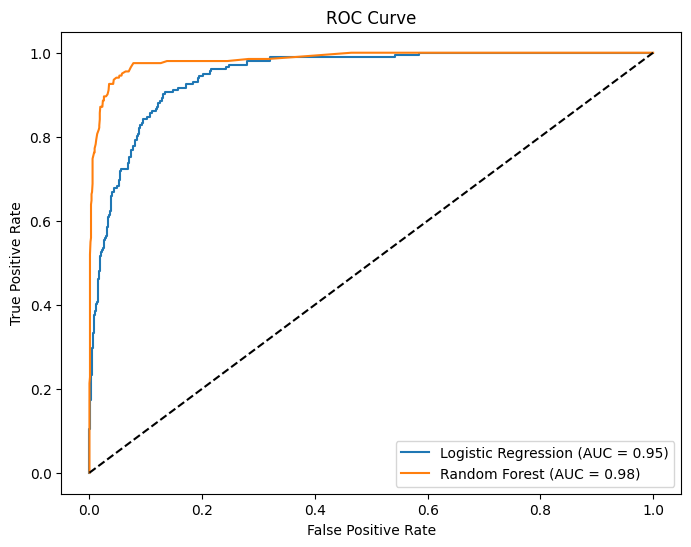

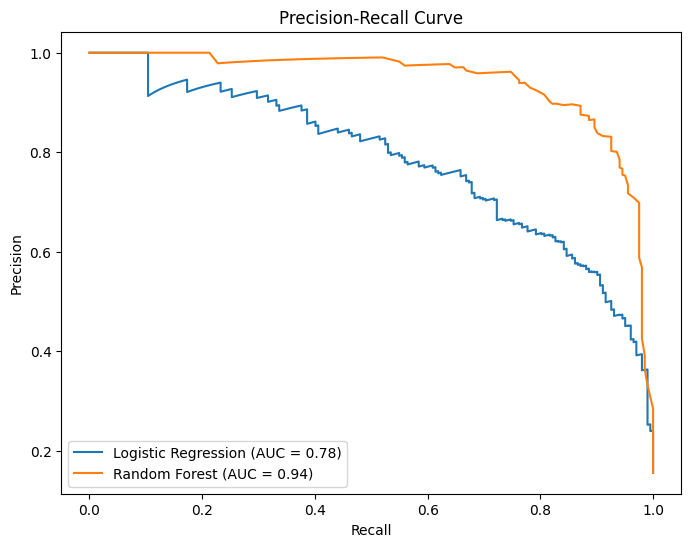

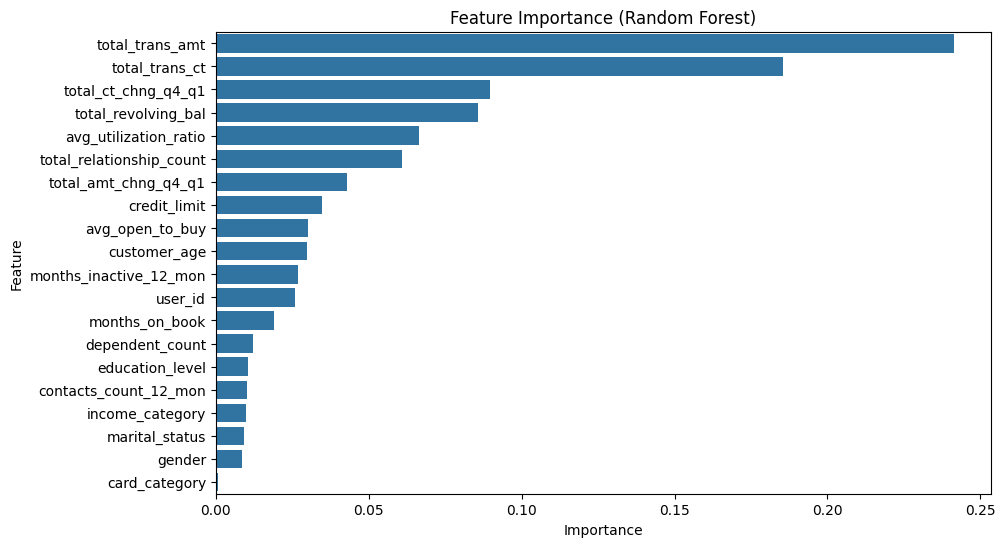

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Enhancements
# 1. ROC AUC Score
# Logistic Regression
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of positive class
roc_auc_lr = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression ROC AUC: {roc_auc_lr}")

# Random Forest
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"Random Forest ROC AUC: {roc_auc_rf}")

# 2. ROC Curve Visualization
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall Curve
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
pr_auc_lr = auc(recall_lr, precision_lr)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


# 4. Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


# ... (Rest of your code) ...

Overall Churn Rate: 15.62%


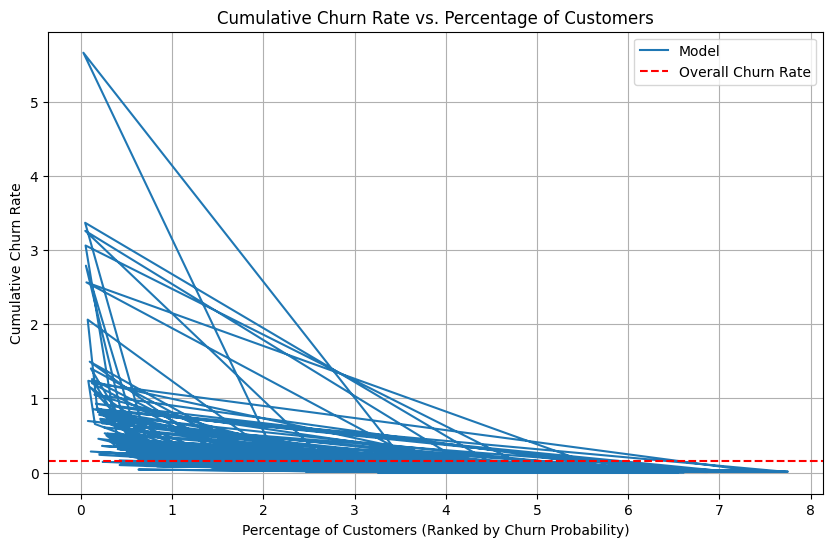

Churn Rate for the top 20%: 74.42%


In [ ]:
# Calculate the churn rate for the entire test set
overall_churn_rate = np.mean(y_test)
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")


# Create a DataFrame to store predicted probabilities and actual churn
results_df = pd.DataFrame({'Probability': y_pred_proba_rf, 'Actual_Churn': y_test})

# Sort by predicted probability in descending order to identify top churn candidates
results_df_sorted = results_df.sort_values('Probability', ascending=False)

# Calculate the cumulative churn rate
results_df_sorted['Cumulative_Churn'] = results_df_sorted['Actual_Churn'].cumsum()
results_df_sorted['Cumulative_Percent'] = results_df_sorted.index / len(results_df_sorted)
results_df_sorted['Cumulative_Churn_Rate'] = results_df_sorted['Cumulative_Churn'] / results_df_sorted.index


# Plot cumulative churn rate vs percentage of customers
plt.figure(figsize=(10, 6))
plt.plot(results_df_sorted['Cumulative_Percent'], results_df_sorted['Cumulative_Churn_Rate'], label='Model')
plt.axhline(y=overall_churn_rate, color='r', linestyle='--', label='Overall Churn Rate')
plt.xlabel('Percentage of Customers (Ranked by Churn Probability)')
plt.ylabel('Cumulative Churn Rate')
plt.title('Cumulative Churn Rate vs. Percentage of Customers')
plt.legend()
plt.grid(True)
plt.show()

# Example: Calculate churn rate for the top 20% of customers predicted to churn
top_20_percent_index = int(len(results_df_sorted) * 0.20)
top_20_churn_rate = results_df_sorted['Actual_Churn'][:top_20_percent_index].mean()
print(f"Churn Rate for the top 20%: {top_20_churn_rate:.2%}")

In [ ]:
# Explanatory Model Analysis and Recommendations

# 1. Pentingnya Fitur:
# Plot penting fitur Random Forest mengungkap faktor yang paling berpengaruh dalam memprediksi churn pelanggan. Fokus pada fitur-fitur utama (misalnya, Jumlah Total Hubungan, Bulan yang Dibukukan, Total Saldo Bergulir). Pahami *mengapa* fitur-fitur ini penting. Misalnya, apakah saldo bergulir yang tinggi benar-benar menunjukkan churn, atau apakah itu berkorelasi dengan faktor lain?

# Rekomendasi:
# * Prioritaskan strategi retensi pelanggan yang menargetkan pelanggan dengan nilai tinggi untuk fitur-fitur utama. Misalnya, tawarkan insentif atau layanan yang dipersonalisasi kepada pelanggan dengan saldo bergulir tinggi atau mereka yang telah lama menjadi nasabah bank.
# * Selidiki hubungan antara fitur-fitur ini lebih dalam. Segmentasikan pelanggan berdasarkan fitur-fitur ini (misalnya, saldo bergulir tinggi vs. rendah) dan analisis perilaku mereka lebih cermat. Apakah mereka memiliki karakteristik bersama lainnya yang dapat membantu menjelaskan risiko churn mereka?

# 2. Segmentasi Pelanggan (berdasarkan analisis berbagai fitur):
# Analisis mengungkap beberapa hubungan antara tingkat pendidikan, kategori pendapatan, usia pelanggan, dan churn. Segmentasi lebih lanjut dapat mengungkap subkelompok dengan pola churn yang berbeda.

# Rekomendasi:
# * Terapkan kampanye yang ditargetkan berdasarkan segmen pelanggan. Pelanggan dengan kombinasi spesifik tingkat pendidikan, pendapatan, dan usia mungkin merespons lebih baik terhadap strategi retensi yang berbeda.
# * Selidiki akar penyebab di balik tingkat churn yang berbeda dalam segmen tersebut. Lakukan survei pelanggan atau kelompok fokus untuk memahami motivasi mereka untuk keluar.

# 3. Metrik Kinerja Model:
# Akurasi model, ROC AUC, dan kurva presisi-recall memberikan wawasan tentang kekuatan prediktifnya. Evaluasi trade-off antara presisi dan recall berdasarkan biaya positif palsu vs. negatif palsu. Jika kehilangan churner mahal, prioritaskan recall tinggi.

# Rekomendasi:
# * Terus pantau kinerja model, terutama saat data baru tersedia. Latih ulang model secara berkala untuk menjaga keakuratan dan relevansi.
# * Pertimbangkan untuk menggunakan model untuk memprioritaskan penjangkauan pelanggan. Fokuskan sumber daya pada pelanggan dengan probabilitas churn tertinggi (berdasarkan kerangka data hasil yang diurutkan).

# 4. Analisis Tingkat Churn Kumulatif:
# Analisis tingkat churn kumulatif sangat berharga untuk mengidentifikasi pelanggan yang paling berisiko. Plot membantu menilai kemampuan model untuk mengidentifikasi dengan tepat mereka yang berisiko paling tinggi.

# Rekomendasi:
# * Gunakan model untuk secara proaktif mengidentifikasi 20% teratas (atau kuantil lainnya) pelanggan yang paling mungkin melakukan churn. Terapkan upaya retensi yang ditargetkan untuk kelompok ini. Strategi ini sering kali menghasilkan dampak yang lebih besar daripada kampanye berbasis luas. Analisis menunjukkan peningkatan tingkat churn saat berfokus pada kelompok probabilitas tertinggi.

# 5. Uji Chi-kuadrat dan Analisis Hubungan
# Uji statistik menunjukkan signifikansi variabel tertentu seperti jenis kelamin, jumlah hubungan, tingkat pendidikan, dan pendapatan pada churn pelanggan.

# Rekomendasi:
# * Untuk variabel dengan nilai-p yang signifikan secara statistik (terutama nilai-p yang lebih rendah): Targetkan upaya retensi ke kelompok tertentu dalam variabel ini. Misalnya, jika tingkat pendidikan atau kelompok gender tertentu menunjukkan tingkat pergantian yang jauh lebih tinggi, rancang kampanye yang membahas kebutuhan spesifik mereka.
# * Untuk variabel tanpa hubungan yang signifikan secara statistik: Evaluasi ulang penyertaannya dalam model Anda karena mungkin tidak berkontribusi pada kemampuan prediktifnya. Jelajahi interaksi antara fitur tersebut dan fitur lainnya.

# 6. Perlakuan Outlier:
# Pertimbangan yang cermat diperlukan untuk menghilangkan outlier. Pastikan outlier dihilangkan dengan tepat (jika penghapusan dianggap perlu) dan jelajahi implikasi penghapusannya dari model.

# Rekomendasi Umum:
# * Terapkan mekanisme umpan balik pelanggan yang kuat untuk terus mengumpulkan informasi tentang kepuasan pelanggan dan masalah yang dihadapi.
# * Berinvestasilah dalam sistem manajemen hubungan pelanggan (CRM) yang memungkinkan interaksi yang dipersonalisasi.
# * Analisis data pelanggan secara berkala untuk memantau tren dan pola yang mungkin mengindikasikan potensi churn.

